In [1]:
import pandas as pd
import numpy as np
# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from graphviz import Digraph
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import LambdaCallback
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib inline

In [2]:
# Let`s import all packages that we may need:

import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
#from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
#df = pd.read_csv('/content/AppleFinalData.csv')
df= pd.read_csv('/content/AAPL.csv')
df.shape
df.tail(10)

,Date,Open,High,Low,Close,Adj_Close,Volume,Compound,Negative,Neutral,Positive
2507,11/16/2016,26.674999,27.557501,26.650000,27.497499,25.624222,235362000,0.9869,0.073,0.713,0.214
2508,11/17/2016,27.452499,27.587500,27.207500,27.487499,25.614901,110528000,0.9231,0.031,0.882,0.086
2509,11/18/2016,27.430000,27.635000,27.415001,27.514999,25.640526,113715600,0.7932,0.052,0.847,0.101
2510,11/21/2016,27.530001,27.997499,27.502501,27.932501,26.029589,117058400,-0.6908,0.106,0.797,0.097
2511,11/22/2016,27.987499,28.105000,27.850000,27.950001,26.045897,103862000,-0.8885,0.130,0.786,0.084
2512,11/23/2016,27.840000,27.877501,27.582500,27.807501,25.913101,109705600,0.0000,0.000,0.000,0.000
2513,11/25/2016,27.782499,27.967501,27.737499,27.947500,26.043566,45903600,-0.8990,0.115,0.885,0.000
2514,11/28/2016,27.857500,28.117500,27.847500,27.892500,25.992311,108776000,0.0000,0.000,0.000,0.000
2515,11/29/2016,27.695000,28.007500,27.517500,27.865000,25.966688,114115200,0.0000,0.000,0.000,0.000
2516,11/30/2016,27.900000,28.049999,27.567499,27.629999,25.747696,144649200,0.0000,0.000,0.000,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj_Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
 7   Compound   2517 non-null   float64
 8   Negative   2517 non-null   float64
 9   Neutral    2517 non-null   float64
 10  Positive   2517 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 216.4+ KB


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
Compound     0
Negative     0
Neutral      0
Positive     0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume,Compound,Negative,Neutral,Positive
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000
mean,15.179944,15.325525,15.016435,15.173809,13.349430,5.382633e+08,0.476040,0.049342,0.787482,0.086106
std,9.054652,9.120562,8.982671,9.051225,8.278135,3.961928e+08,0.626543,0.036409,0.232429,0.043860
min,2.791071,2.901786,2.741786,2.792857,2.370567,4.590360e+07,-0.997000,0.000000,0.000000,0.000000
25%,6.394286,6.464286,6.262500,6.385000,5.419566,2.545340e+08,0.000000,0.024000,0.812000,0.060000
50%,14.285714,14.413929,14.120000,14.276071,12.143852,4.311524e+08,0.822800,0.045000,0.852000,0.087000
75%,23.447500,23.660000,23.170000,23.424999,20.531017,7.099596e+08,0.954600,0.069000,0.883000,0.113000
max,33.615002,33.634998,32.849998,33.250000,29.941334,3.372970e+09,0.999200,0.363000,1.000000,0.283000


In [7]:
# df["Daily Fluctuation"] = df["High"] - df["Low"]
# average_fluctuation = df["Daily Fluctuation"].mean()
# print(f"Average price fluctuation: {average_fluctuation}")

In [8]:
df.head()
#df.drop('Close', axis=1)
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-9-6f3299427faf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


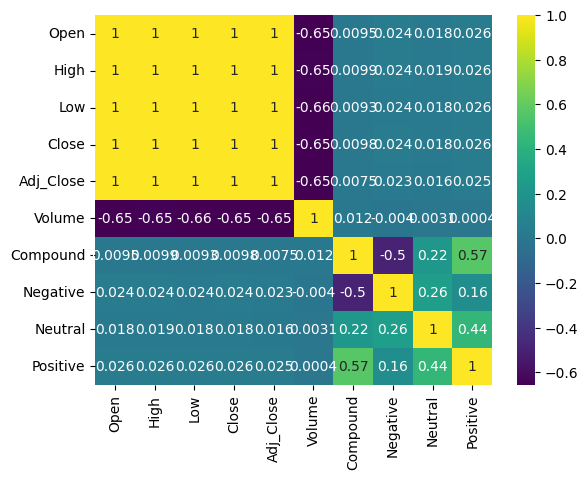

In [9]:
corr = df.corr()

'''plt.plot(df['compound'])
plt.show()'''

corr
sns.heatmap(corr, cmap='viridis', annot = True);

In [10]:
df.drop('Adj_Close', inplace=True, axis=1)
df.drop('Negative', inplace=True, axis=1)
df.drop('Positive', inplace=True, axis=1)
df.drop('Neutral', inplace=True, axis=1)
df.head()
df.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Compound           float64
dtype: object

Do some graphs

In [11]:
# plt.figure(figsize=(150, 70))
# sns.lineplot(x="Date", y=["Open", "Compound"], data=df)
# # plt.show()

In [12]:
# plt.scatter(df['Open'], df['Volume'])
# plt.show()

<ipython-input-13-8dec5cba2a26>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax=axes[0, 0], x='Open', y='Close', data=df, palette='magma');
<ipython-input-13-8dec5cba2a26>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax=axes[0, 1], x='Volume', y='Close', data=df, palette='magma');
<ipython-input-13-8dec5cba2a26>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax=axes[0, 2], x='High', y='Close', data=df, palette='magma');
<ipython-input-13-8dec5cba2a26>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax=axes[1, 0], x='Low', y='Close', data=df, palette='magma');
<ipython-input-13-8dec5cba2a26>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax=axes[1, 1], x='Compound', y='Close', data=df, palette='magma');
<ipython-input-13-8dec5cba2a26

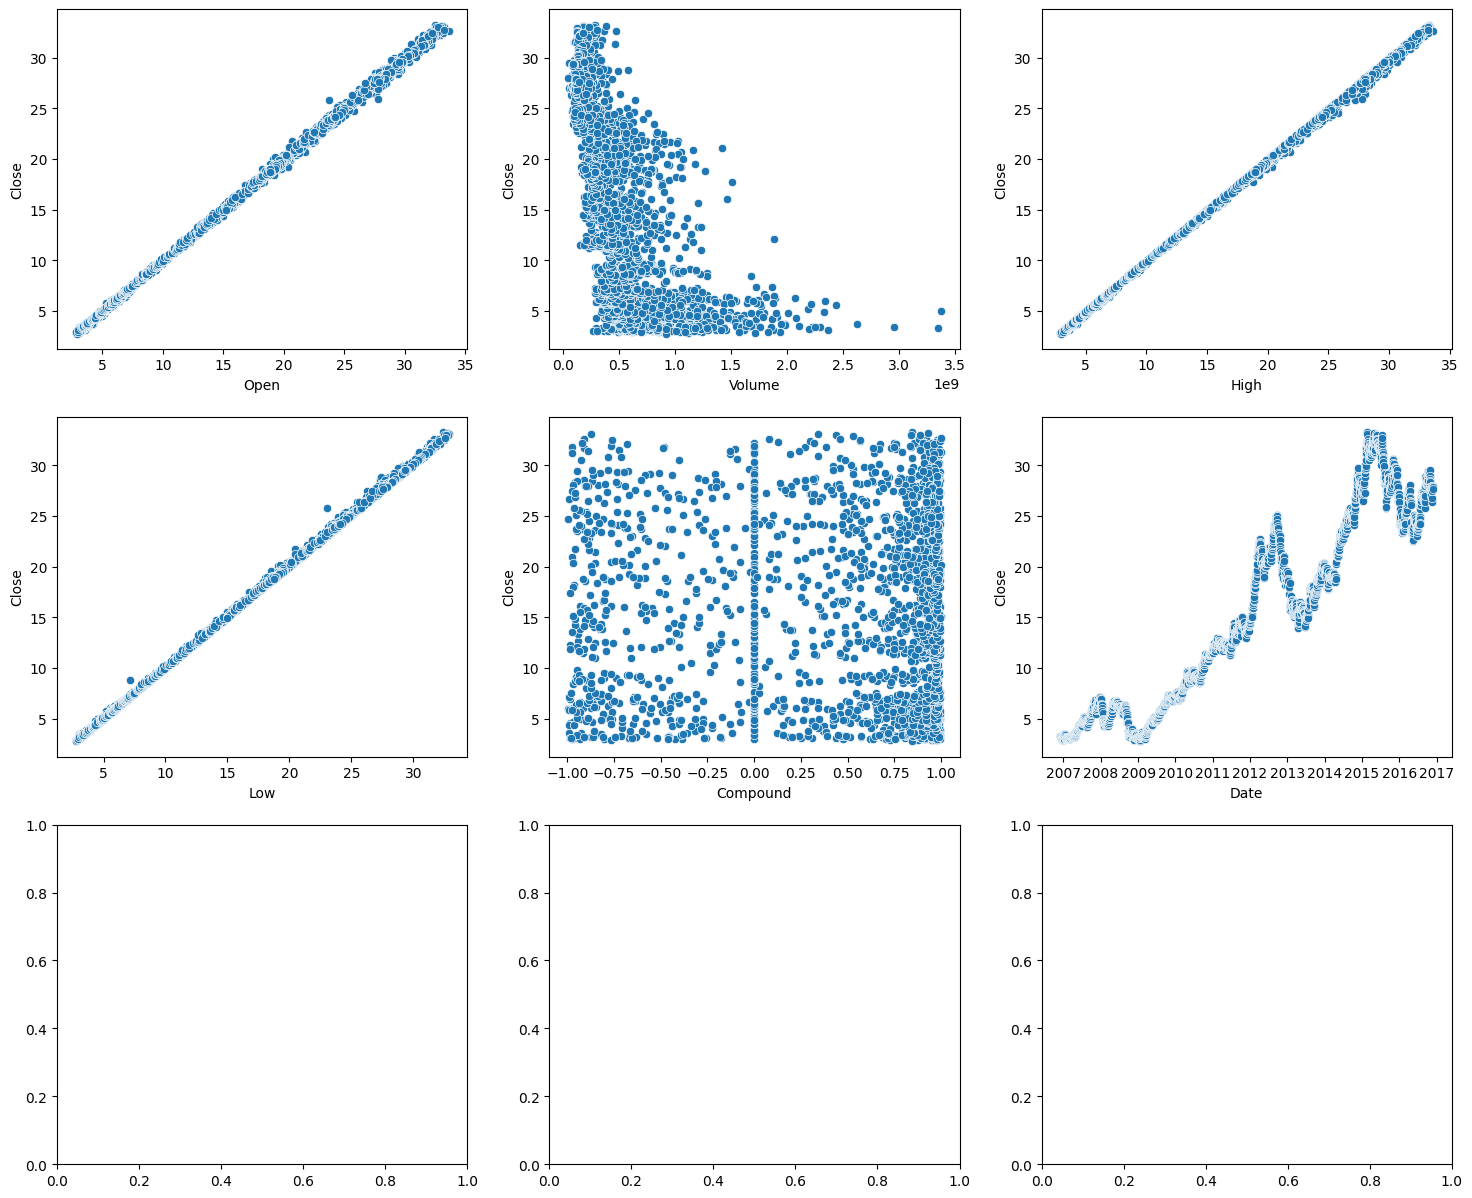

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.scatterplot(ax=axes[0, 0], x='Open', y='Close', data=df, palette='magma');
sns.scatterplot(ax=axes[0, 1], x='Volume', y='Close', data=df, palette='magma');
sns.scatterplot(ax=axes[0, 2], x='High', y='Close', data=df, palette='magma');
sns.scatterplot(ax=axes[1, 0], x='Low', y='Close', data=df, palette='magma');
sns.scatterplot(ax=axes[1, 1], x='Compound', y='Close', data=df, palette='magma');
sns.scatterplot(ax=axes[1, 2], x='Date', y='Close', data=df, palette='magma');
#sns.scatterplot(ax=axes[2, 0], x='Date', y='Close', data=df, palette='magma');

<ipython-input-14-635f602f6c76>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0, 0], x='Open', y='Volume', data=df, palette='magma');
<ipython-input-14-635f602f6c76>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0, 1], x='Close', y='Volume', data=df, palette='magma');
<ipython-input-14-635f602f6c76>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0, 2], x='High', y='Volume', data=df, palette='magma');
<ipython-input-14-635f602f6c76>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[1, 0], x='Low', y='Volume', data=df, palette='magma');
<ipython-input-14-635f602f6c76>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[1, 1], x='Compound', y='Volume', data=df, palette='magma');
<ipython-input-14-635f602f6c76>:8: UserWa

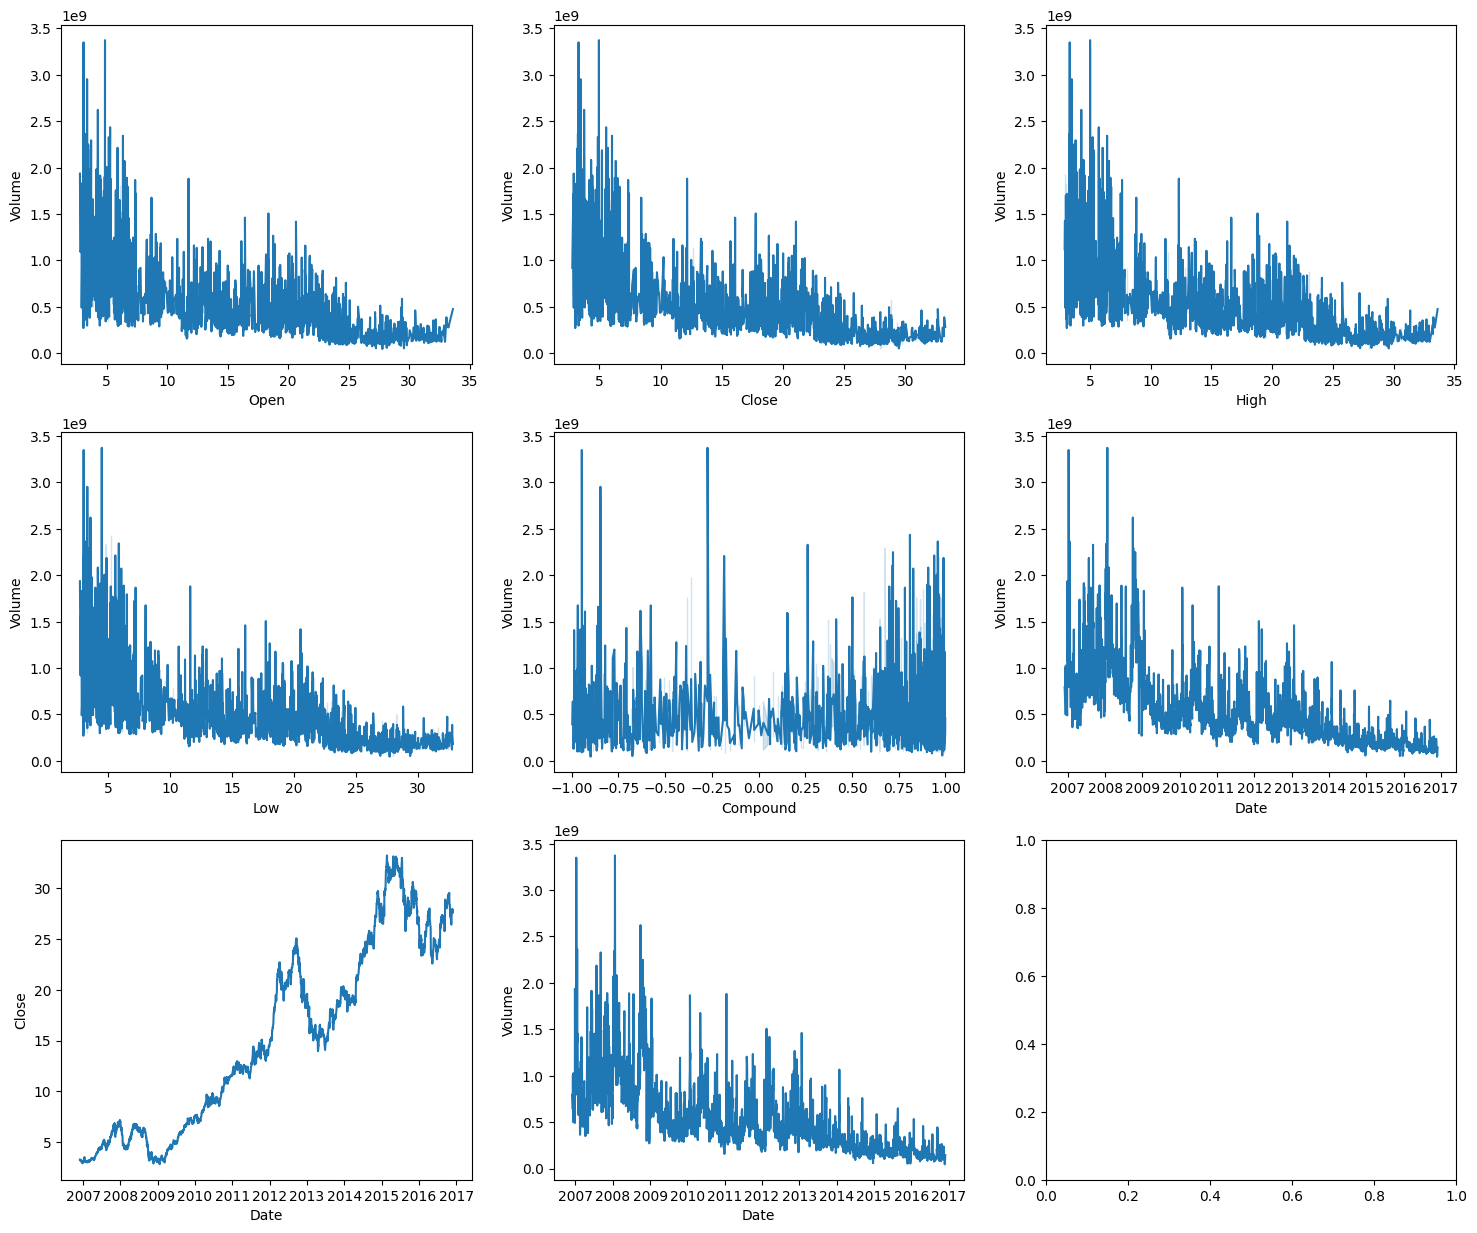

In [14]:
# sns.lineplot(data=df[['Open', 'High', 'Low', 'Volume']], palette=['red', 'blue', 'purple', 'pink'])
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.lineplot(ax=axes[0, 0], x='Open', y='Volume', data=df, palette='magma');
sns.lineplot(ax=axes[0, 1], x='Close', y='Volume', data=df, palette='magma');
sns.lineplot(ax=axes[0, 2], x='High', y='Volume', data=df, palette='magma');
sns.lineplot(ax=axes[1, 0], x='Low', y='Volume', data=df, palette='magma');
sns.lineplot(ax=axes[1, 1], x='Compound', y='Volume', data=df, palette='magma');
sns.lineplot(ax=axes[1, 2], x='Date', y='Volume', data=df, palette='magma');
sns.lineplot(ax=axes[2, 0], x='Date', y='Close', data=df, palette='magma');
sns.lineplot(ax=axes[2, 1], x='Date', y='Volume', data=df, palette='magma');

<ipython-input-15-6d14076d4e44>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0, 0], x='Open', y='Close', data=df, palette='magma');
<ipython-input-15-6d14076d4e44>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0, 1], x='Volume', y='Close', data=df, palette='magma');
<ipython-input-15-6d14076d4e44>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0, 2], x='High', y='Close', data=df, palette='magma');
<ipython-input-15-6d14076d4e44>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[1, 0], x='Low', y='Close', data=df, palette='magma');
<ipython-input-15-6d14076d4e44>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[1, 1], x='Compound', y='Close', data=df, palette='magma');
<ipython-input-15-6d14076d4e44>:8: UserWarnin

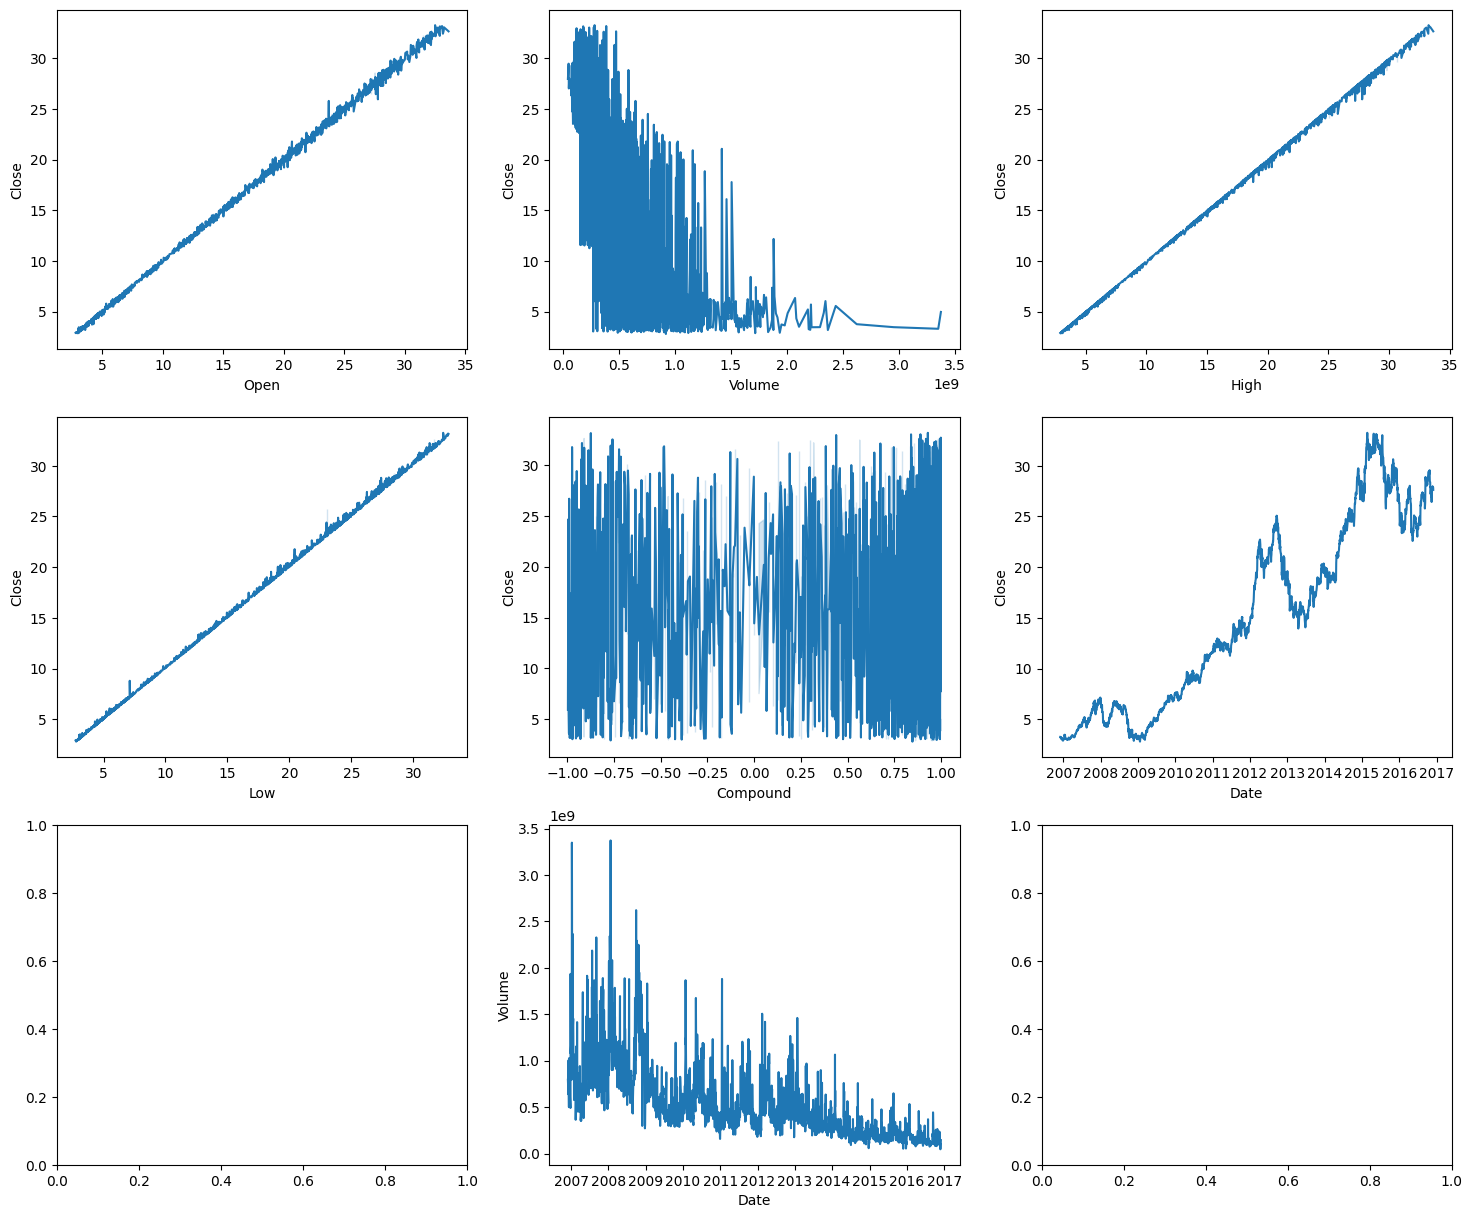

In [15]:
# sns.lineplot(data=df[['Open', 'High', 'Low', 'Volume']], palette=['red', 'blue', 'purple', 'pink'])
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.lineplot(ax=axes[0, 0], x='Open', y='Close', data=df, palette='magma');
sns.lineplot(ax=axes[0, 1], x='Volume', y='Close', data=df, palette='magma');
sns.lineplot(ax=axes[0, 2], x='High', y='Close', data=df, palette='magma');
sns.lineplot(ax=axes[1, 0], x='Low', y='Close', data=df, palette='magma');
sns.lineplot(ax=axes[1, 1], x='Compound', y='Close', data=df, palette='magma');
sns.lineplot(ax=axes[1, 2], x='Date', y='Close', data=df, palette='magma');
sns.lineplot(ax=axes[2, 1], x='Date', y='Volume', data=df, palette='magma');

<Axes: xlabel='Low', ylabel='Count'>

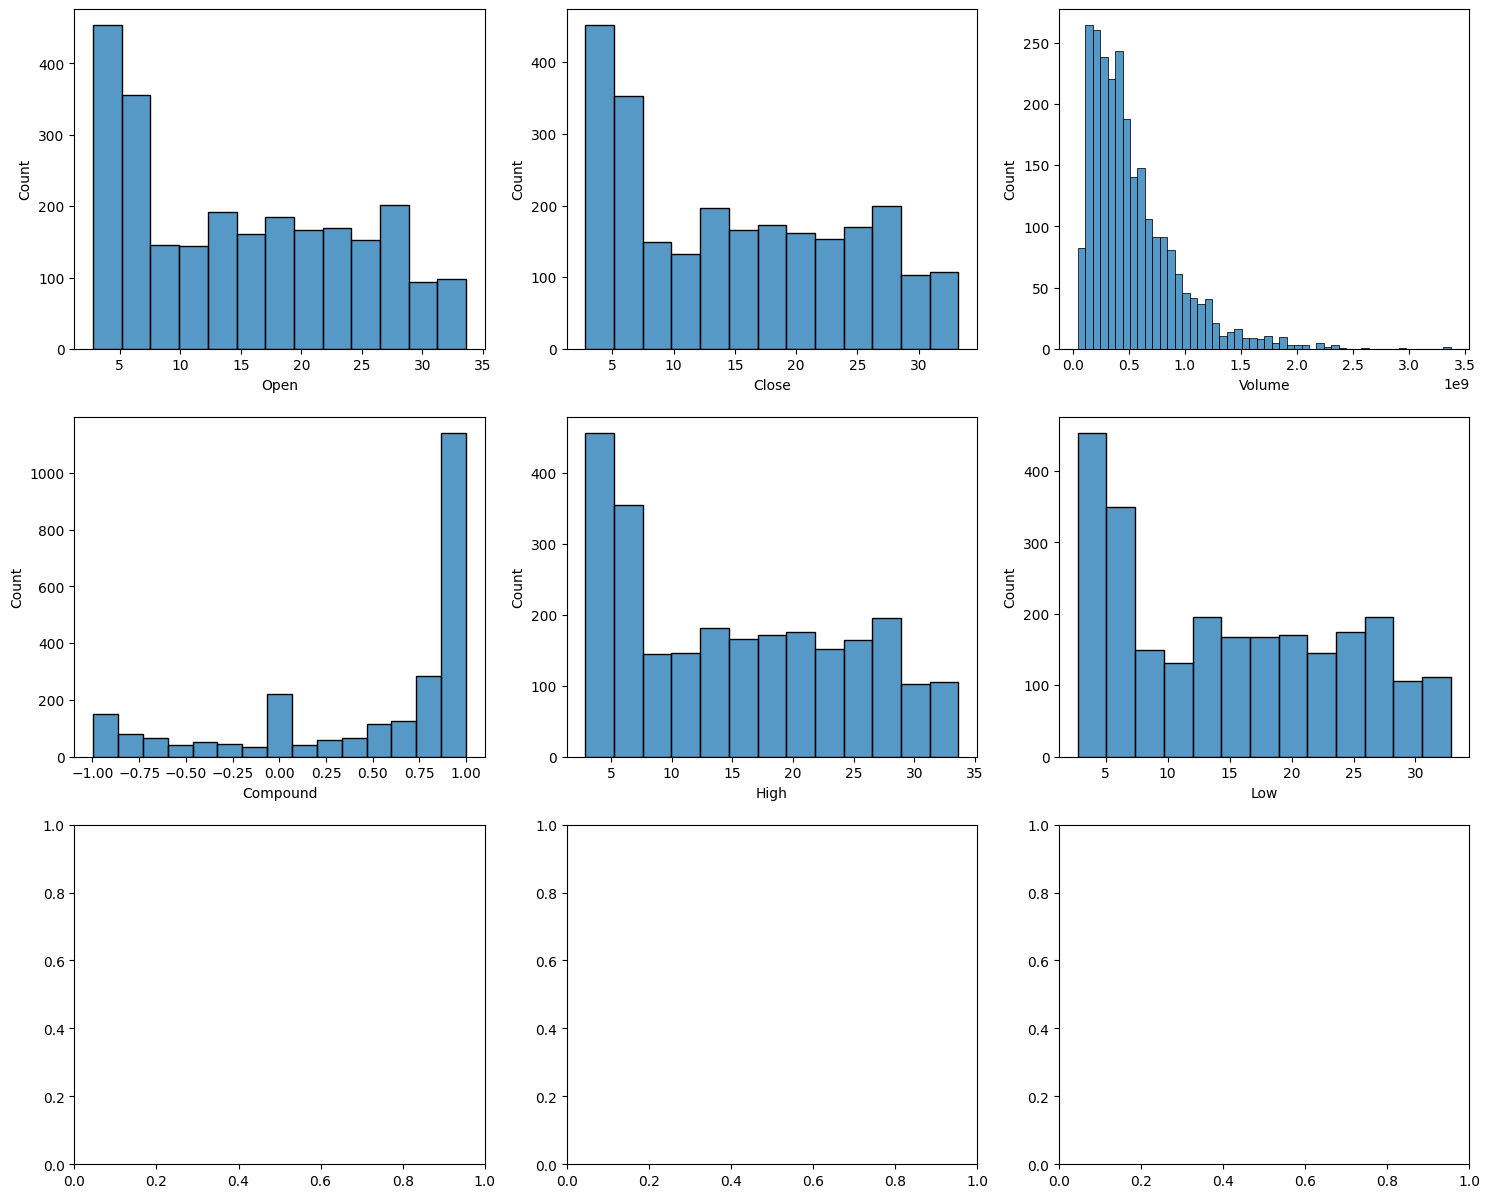

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.histplot(ax=axes[0, 0],data=df, x="Open")
sns.histplot(ax=axes[0, 1],data=df, x="Close")
sns.histplot(ax=axes[0, 2],data=df, x="Volume")
sns.histplot(ax=axes[1, 0],data=df, x="Compound")
sns.histplot(ax=axes[1, 1],data=df, x="High")
sns.histplot(ax=axes[1, 2],data=df, x="Low")


<ipython-input-17-5b65fdb65ad7>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_compoundperYear = df[df['Date']<'23-11-2007']


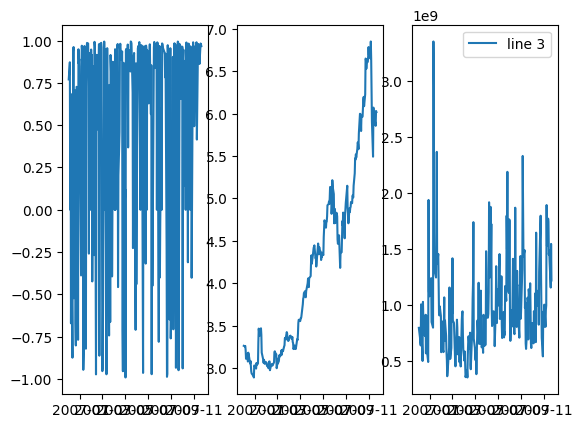

In [17]:
# plt.subplot
df_compoundperYear = df[df['Date']<'23-11-2007']
plt.subplot(1, 3, 1)
plt.plot(df_compoundperYear['Date'], df_compoundperYear['Compound'], label = "line 1")
plt.subplot(1, 3, 2)
plt.plot(df_compoundperYear['Date'], df_compoundperYear['Close'], label = "line 2")
plt.subplot(1, 3, 3)
plt.plot(df_compoundperYear['Date'], df_compoundperYear['Volume'], label = "line 3")

plt.legend()
plt.show()

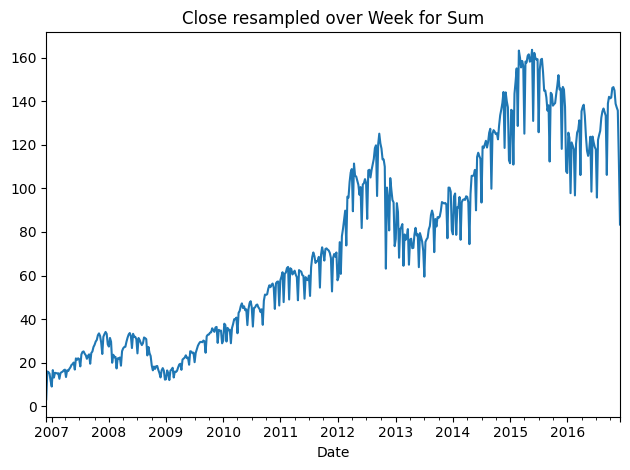

In [18]:
dfdate = df.copy()
dfdate = dfdate.set_index('Date')
dfdate.Close.resample('W').sum().plot(title='Close resampled over Week for Sum')
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red')
plt.tight_layout()
plt.show()

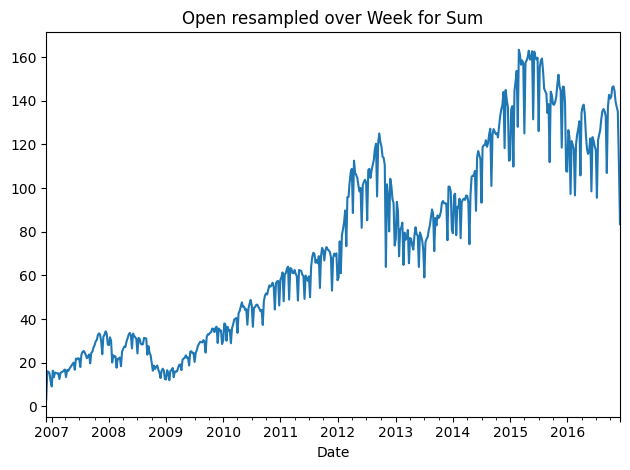

In [19]:
dfdate.Open.resample('W').sum().plot(title='Open resampled over Week for Sum')
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red')
plt.tight_layout()
plt.show()

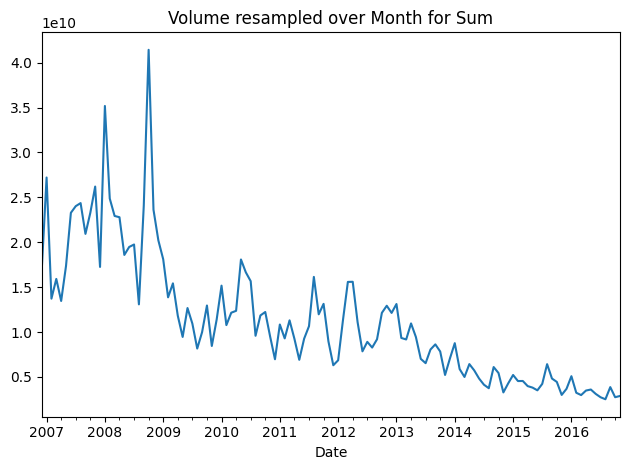

In [20]:
dfdate.Volume.resample('M').sum().plot(title='Volume resampled over Month for Sum')
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red')
plt.tight_layout()
plt.show()

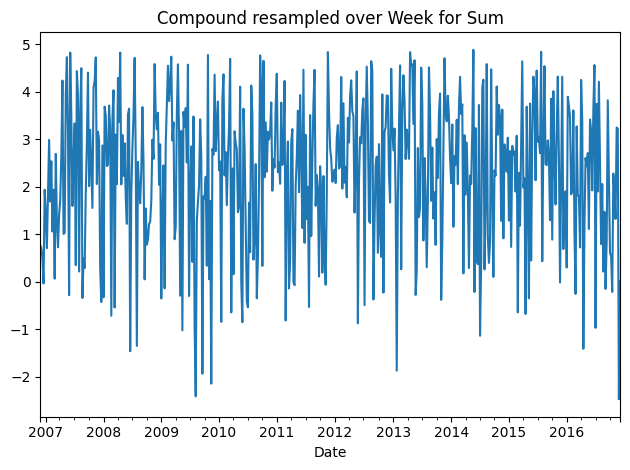

In [21]:
dfdate.Compound.resample('W').sum().plot(title='Compound resampled over Week for Sum')
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red')
plt.tight_layout()
plt.show()

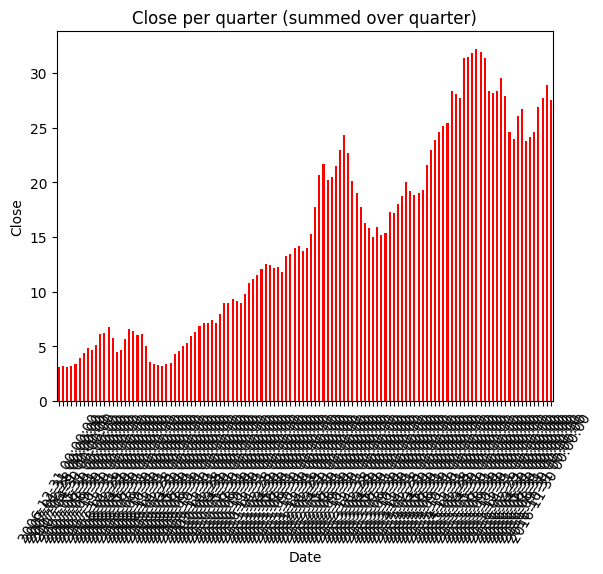

In [22]:

dfdate['Close'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Close')
plt.title('Close per quarter (summed over quarter)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x78efd165efb0>,
 'caps': [<matplotlib.lines.Line2D at 0x78efd165f4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78efd165ed10>],
 'medians': [<matplotlib.lines.Line2D at 0x78efd165fa30>],
 'fliers': [<matplotlib.lines.Line2D at 0x78efd165fcd0>],
 'means': []}

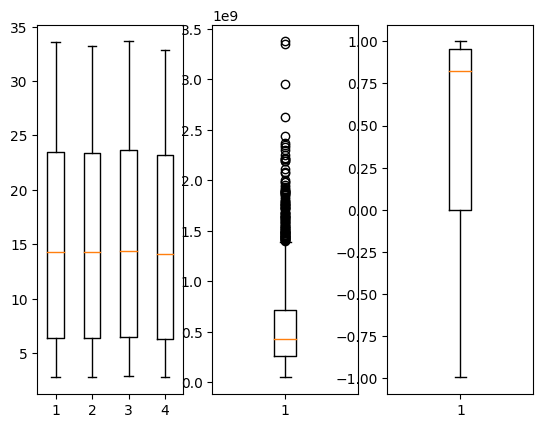

In [23]:
plt.subplot(1, 3, 1)
plt.boxplot(df[['Open','Close','High','Low']])

plt.subplot(1, 3, 2)
plt.boxplot(df['Volume'])

plt.subplot(1, 3, 3)
plt.boxplot(df['Compound'])


In [24]:
#df['Positive'] = df['compound']>=0
df.head()


,Date,Open,High,Low,Close,Volume,Compound
0,2006-12-01,3.278571,3.297500,3.217857,3.261429,795079600,0.7707
1,2006-12-04,3.281429,3.287500,3.232143,3.254286,709536800,0.8720
2,2006-12-05,3.273214,3.297500,3.245357,3.259643,662838400,0.0000
3,2006-12-06,3.237143,3.263929,3.202500,3.208214,638184400,0.6858
4,2006-12-07,3.215357,3.232143,3.103571,3.108571,1004827600,-0.6712


<ipython-input-25-6493c9c4b7d5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


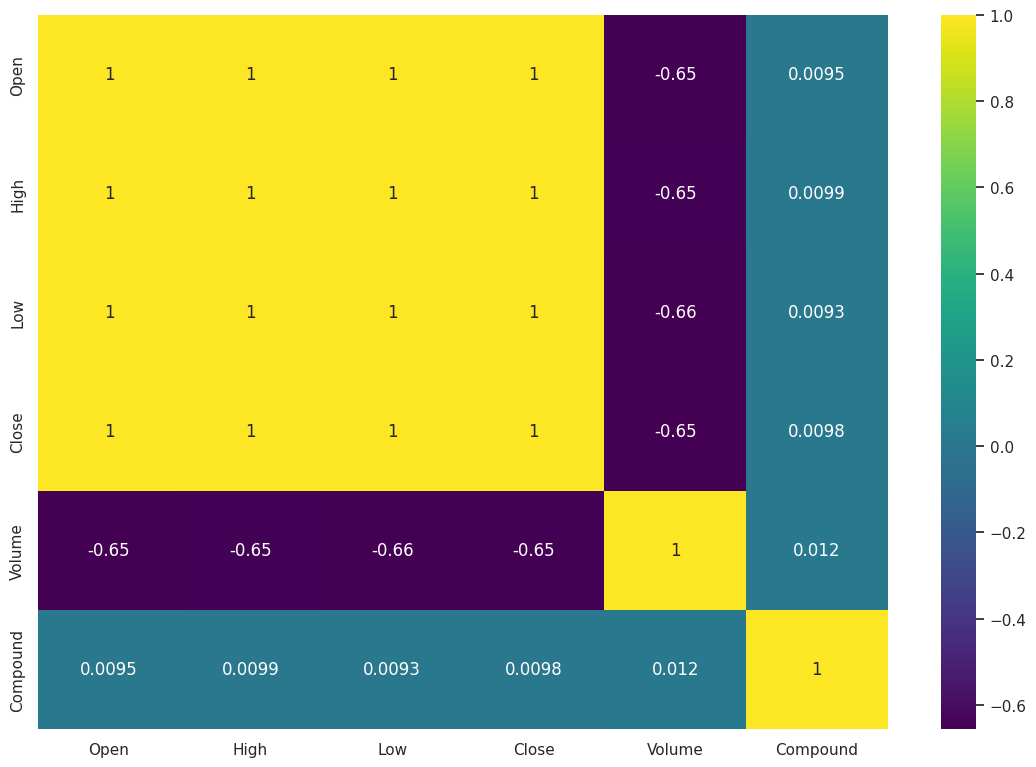

In [25]:
corr = df.corr()
corr
sns.set(rc={'figure.figsize':(13.7,9.27)})
sns.heatmap(corr, cmap='viridis', annot = True);

In [26]:
df.describe()

,Open,High,Low,Close,Volume,Compound
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,15.179944,15.325525,15.016435,15.173809,5.382633e+08,0.476040
std,9.054652,9.120562,8.982671,9.051225,3.961928e+08,0.626543
min,2.791071,2.901786,2.741786,2.792857,4.590360e+07,-0.997000
25%,6.394286,6.464286,6.262500,6.385000,2.545340e+08,0.000000
50%,14.285714,14.413929,14.120000,14.276071,4.311524e+08,0.822800
75%,23.447500,23.660000,23.170000,23.424999,7.099596e+08,0.954600
max,33.615002,33.634998,32.849998,33.250000,3.372970e+09,0.999200


In [27]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

<ipython-input-28-f39e7ccb84ea>:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_encode = df[df['Date']<'23-11-2007']


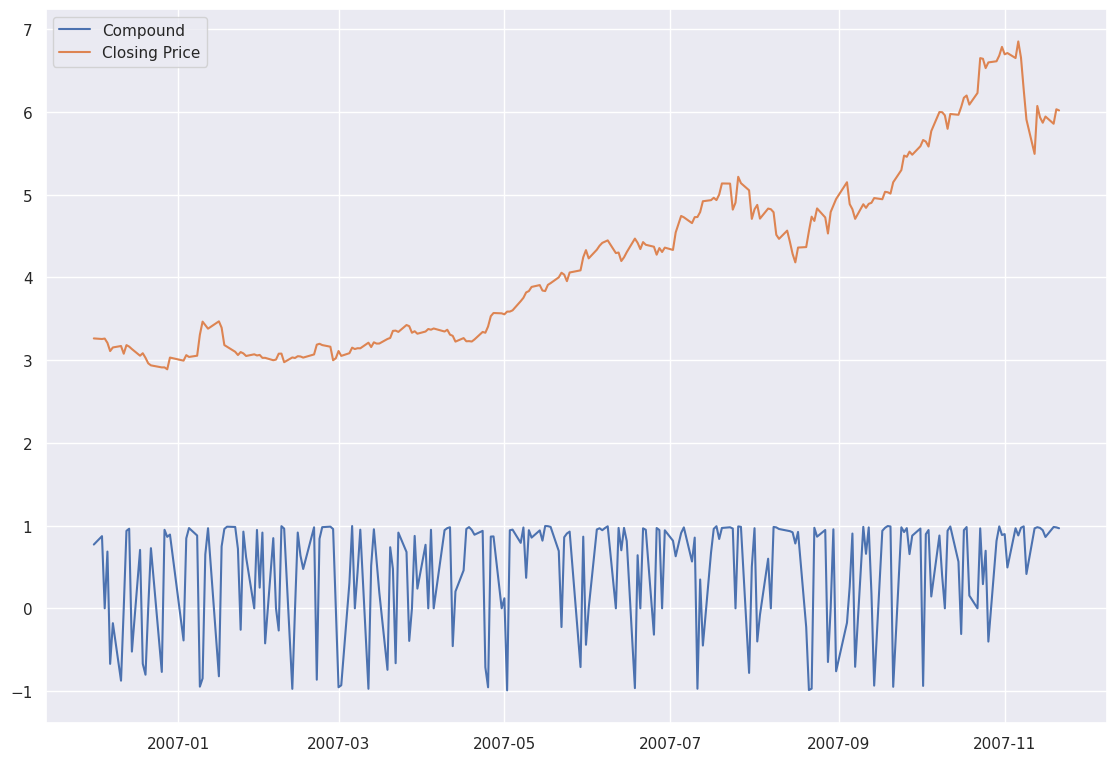

In [28]:
df_encode = df.copy()
numerical_columns = ['Close', 'Volume', 'Compound']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)

df_encode = df[df['Date']<'23-11-2007']
plt.plot(df_encode['Date'], df_encode['Compound'], label = "Compound")
plt.plot(df_encode['Date'], df_encode['Close'], label = "Closing Price")
#plt.plot(df_compoundperYear['Date'], df_compoundperYear['Volume'], label = "line 3")

plt.legend()
plt.show()


In [29]:
df = df.set_index('Date')
df_resample = df.copy()
df_resample.head()

,Open,High,Low,Close,Volume,Compound
Date,,,,,,
2006-12-01,3.278571,3.297500,3.217857,3.261429,795079600,0.7707
2006-12-04,3.281429,3.287500,3.232143,3.254286,709536800,0.8720
2006-12-05,3.273214,3.297500,3.245357,3.259643,662838400,0.0000
2006-12-06,3.237143,3.263929,3.202500,3.208214,638184400,0.6858
2006-12-07,3.215357,3.232143,3.103571,3.108571,1004827600,-0.6712


In [30]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [31]:
 df_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-12-01 to 2016-11-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      2517 non-null   float64
 1   High      2517 non-null   float64
 2   Low       2517 non-null   float64
 3   Close     2517 non-null   float64
 4   Volume    2517 non-null   int64  
 5   Compound  2517 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [32]:
values = df_resample.values
print(values)

[[3.2785710e+00 3.2975000e+00 3.2178570e+00 3.2614290e+00 7.9507960e+08
  7.7070000e-01]
 [3.2814290e+00 3.2875000e+00 3.2321430e+00 3.2542860e+00 7.0953680e+08
  8.7200000e-01]
 [3.2732140e+00 3.2975000e+00 3.2453570e+00 3.2596430e+00 6.6283840e+08
  0.0000000e+00]
 ...
 [2.7857500e+01 2.8117500e+01 2.7847500e+01 2.7892500e+01 1.0877600e+08
  0.0000000e+00]
 [2.7695000e+01 2.8007500e+01 2.7517500e+01 2.7865000e+01 1.1411520e+08
  0.0000000e+00]
 [2.7900000e+01 2.8049999e+01 2.7567499e+01 2.7629999e+01 1.4464920e+08
  0.0000000e+00]]


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.015816   0.012876   0.015812   0.015385   0.225176   0.885533  0.015908   
2   0.015908   0.012550   0.016286   0.015150   0.199465   0.936279  0.015642   
3   0.015642   0.012876   0.016725   0.015326   0.185429   0.499449  0.014472   
4   0.014472   0.011783   0.015302   0.013637   0.178019   0.843002  0.013765   
5   0.013765   0.010749   0.012016   0.010366   0.288219   0.163210  0.010521   

    var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  
1  0.012550  0.016286  0.015150  0.199465  0.936279  
2  0.012876  0.016725  0.015326  0.185429  0.499449  
3  0.011783  0.015302  0.013637  0.178019  0.843002  
4  0.010749  0.012016  0.010366  0.288219  0.163210  
5  0.009459  0.012135  0.011796  0.221929  0.409478  
Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516],
           dtype='int64', le

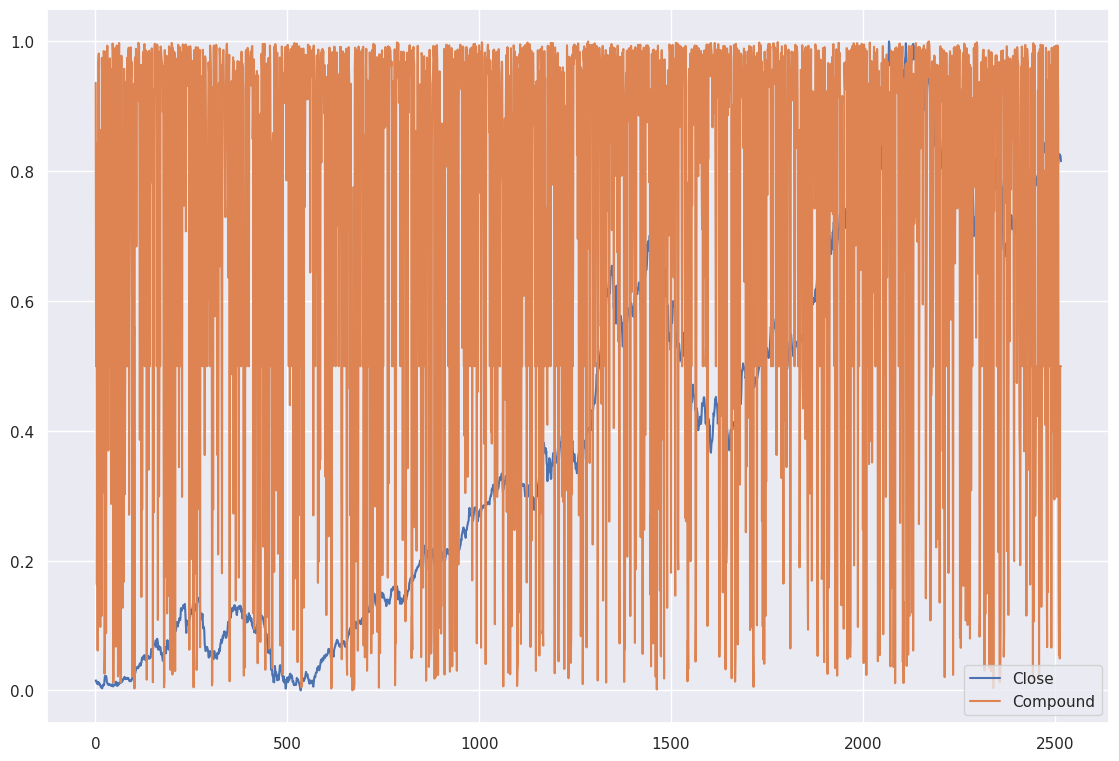

In [33]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction#
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())
print('=======================================')
print(reframed.index)
plt.plot(reframed.index, reframed['var4(t)'], label = "Close")
plt.plot(reframed.index, reframed['var6(t)'], label = "Compound")
#plt.plot(df_compoundperYear['Date'], df_compoundperYear['Volume'], label = "line 3")

plt.legend()
plt.show()


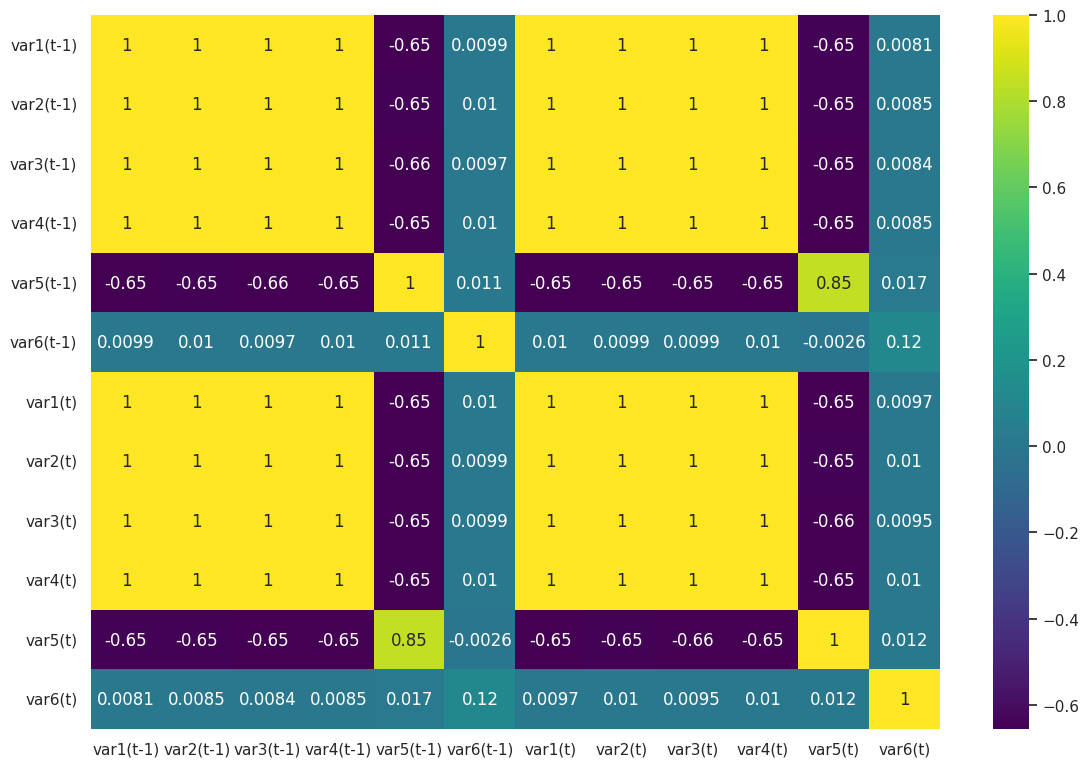

In [34]:
corr = reframed.corr()
sns.heatmap(corr, cmap='viridis', annot = True);

In [35]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,10,11]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var4(t)
1   0.015816   0.012876   0.015812   0.015385   0.225176   0.885533  0.015150
2   0.015908   0.012550   0.016286   0.015150   0.199465   0.936279  0.015326
3   0.015642   0.012876   0.016725   0.015326   0.185429   0.499449  0.013637
4   0.014472   0.011783   0.015302   0.013637   0.178019   0.843002  0.010366
5   0.013765   0.010749   0.012016   0.010366   0.288219   0.163210  0.011796


In [36]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var4(t)
1   0.015816   0.012876   0.015812   0.015385   0.225176   0.885533  0.015150
2   0.015908   0.012550   0.016286   0.015150   0.199465   0.936279  0.015326
3   0.015642   0.012876   0.016725   0.015326   0.185429   0.499449  0.013637
4   0.014472   0.011783   0.015302   0.013637   0.178019   0.843002  0.010366
5   0.013765   0.010749   0.012016   0.010366   0.288219   0.163210  0.011796


In [37]:
# split into train and test sets
values = reframed.values

n_train_time = int(np.ceil( len(df) * .70 ))
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1762, 1, 6) (1762,) (754, 1, 6) (754,)


Epoch 1/20
26/26 - 7s - loss: 0.0351 - val_loss: 0.1443 - 7s/epoch - 250ms/step
Epoch 2/20
26/26 - 0s - loss: 0.0329 - val_loss: 0.0705 - 290ms/epoch - 11ms/step
Epoch 3/20
26/26 - 0s - loss: 0.0188 - val_loss: 0.0166 - 304ms/epoch - 12ms/step
Epoch 4/20
26/26 - 0s - loss: 0.0080 - val_loss: 5.6300e-04 - 325ms/epoch - 12ms/step
Epoch 5/20
26/26 - 0s - loss: 0.0023 - val_loss: 0.0029 - 308ms/epoch - 12ms/step
Epoch 6/20
26/26 - 0s - loss: 0.0016 - val_loss: 0.0013 - 303ms/epoch - 12ms/step
Epoch 7/20
26/26 - 0s - loss: 0.0016 - val_loss: 0.0026 - 331ms/epoch - 13ms/step
Epoch 8/20
26/26 - 0s - loss: 0.0015 - val_loss: 0.0029 - 326ms/epoch - 13ms/step
Epoch 9/20
26/26 - 0s - loss: 0.0015 - val_loss: 0.0019 - 296ms/epoch - 11ms/step
Epoch 10/20
26/26 - 0s - loss: 0.0014 - val_loss: 0.0013 - 287ms/epoch - 11ms/step
Epoch 11/20
26/26 - 0s - loss: 0.0015 - val_loss: 0.0040 - 335ms/epoch - 13ms/step
Epoch 12/20
26/26 - 0s - loss: 0.0015 - val_loss: 0.0017 - 295ms/epoch - 11ms/step
Epoch 13/20

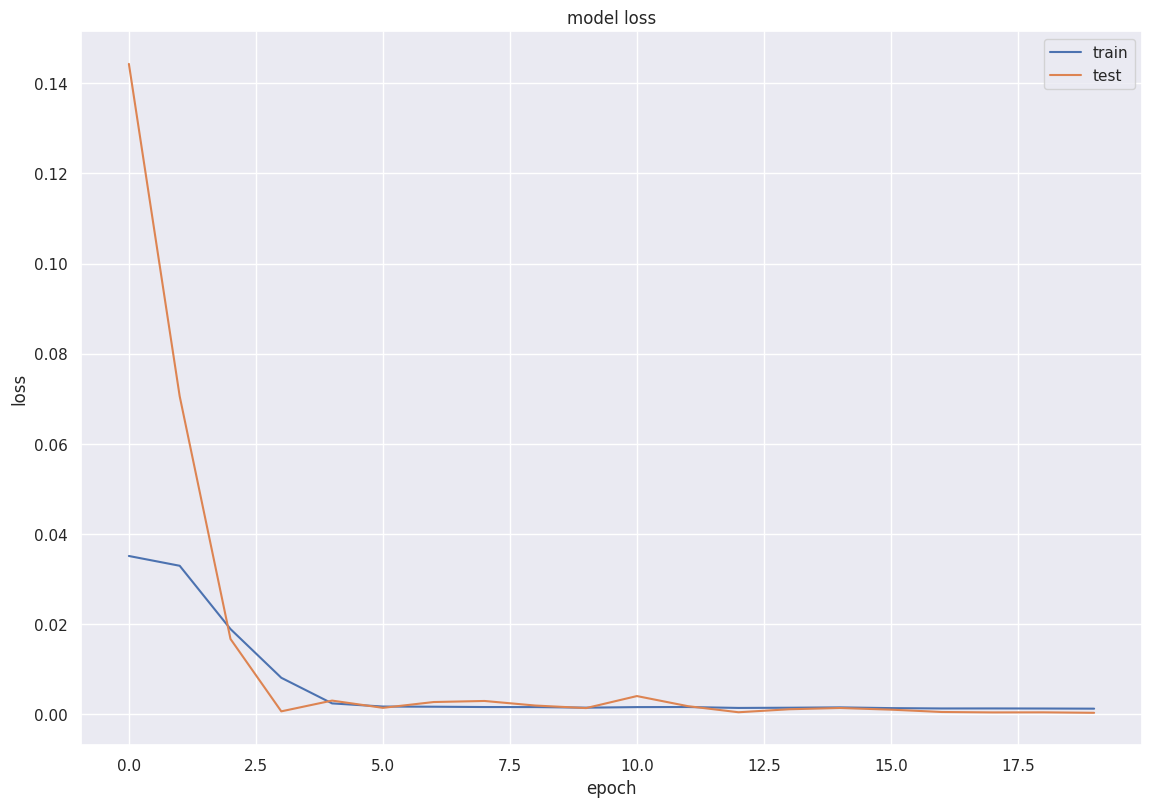

24/24 [==============================] - 1s 5ms/step
Test RMSE: 0.476
average loss  0.005897759302752092


'lstm_network_graphviz.png'

In [38]:
model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 6)) #6 number of features used in predection
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -5:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -5:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print('average loss ' , sum(history.history['loss'])/len(history.history['loss']))
# Visualize the model architecture
plot_model(model, to_file='lstm_network.png', show_shapes=True, show_layer_names=True)

# Extract layer details
layer_details = [(i, layer.__class__.__name__) for i, layer in enumerate(model.layers)]

# Visualize individual nodes and connections using graphviz
dot = Digraph(comment='LSTM Network')
for i, layer_name in layer_details:
    dot.node(str(i), f'{layer_name}\n{model.layers[i].output_shape[1:]}')

for i in range(len(layer_details) - 1):
    dot.edge(str(i), str(i + 1))

# Save the graph visualization as a PNG file
dot.render('lstm_network_graphviz', format='png', cleanup=True)

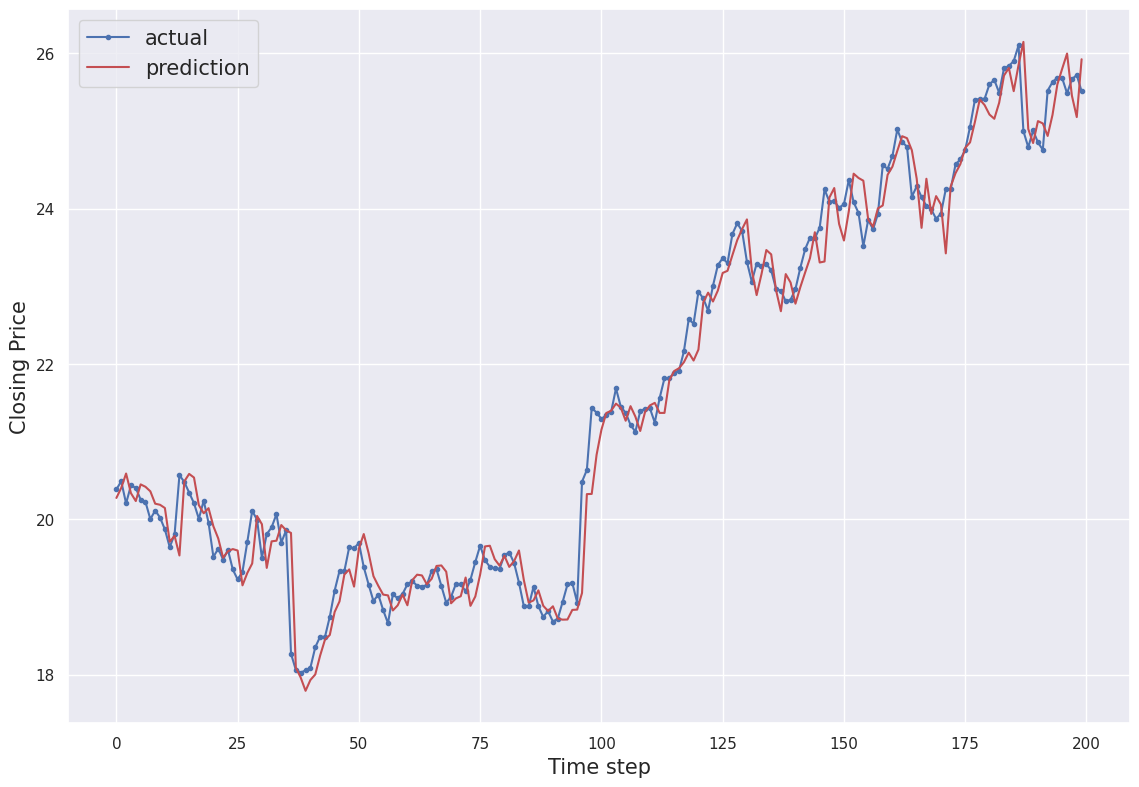

In [39]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Closing Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [40]:
# split into train and test sets
values = reframed.values

n_train_time = int(np.ceil( len(df) * .70 ))
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1762, 1, 6) (1762,) (754, 1, 6) (754,)


Epoch 1/20
26/26 - 5s - loss: 0.0659 - val_loss: 0.3548 - 5s/epoch - 175ms/step
Epoch 2/20
26/26 - 0s - loss: 0.0231 - val_loss: 0.0934 - 274ms/epoch - 11ms/step
Epoch 3/20
26/26 - 0s - loss: 0.0233 - val_loss: 0.0288 - 298ms/epoch - 11ms/step
Epoch 4/20
26/26 - 0s - loss: 0.0131 - val_loss: 0.0025 - 289ms/epoch - 11ms/step
Epoch 5/20
26/26 - 0s - loss: 0.0064 - val_loss: 0.0022 - 299ms/epoch - 12ms/step
Epoch 6/20
26/26 - 0s - loss: 0.0029 - val_loss: 0.0074 - 269ms/epoch - 10ms/step
Epoch 7/20
26/26 - 0s - loss: 0.0025 - val_loss: 0.0023 - 278ms/epoch - 11ms/step
Epoch 8/20
26/26 - 0s - loss: 0.0021 - val_loss: 0.0043 - 324ms/epoch - 12ms/step
Epoch 9/20
26/26 - 0s - loss: 0.0023 - val_loss: 0.0013 - 287ms/epoch - 11ms/step
Epoch 10/20
26/26 - 0s - loss: 0.0020 - val_loss: 0.0019 - 271ms/epoch - 10ms/step
Epoch 11/20
26/26 - 0s - loss: 0.0020 - val_loss: 0.0022 - 275ms/epoch - 11ms/step
Epoch 12/20
26/26 - 0s - loss: 0.0019 - val_loss: 9.5291e-04 - 235ms/epoch - 9ms/step
Epoch 13/20


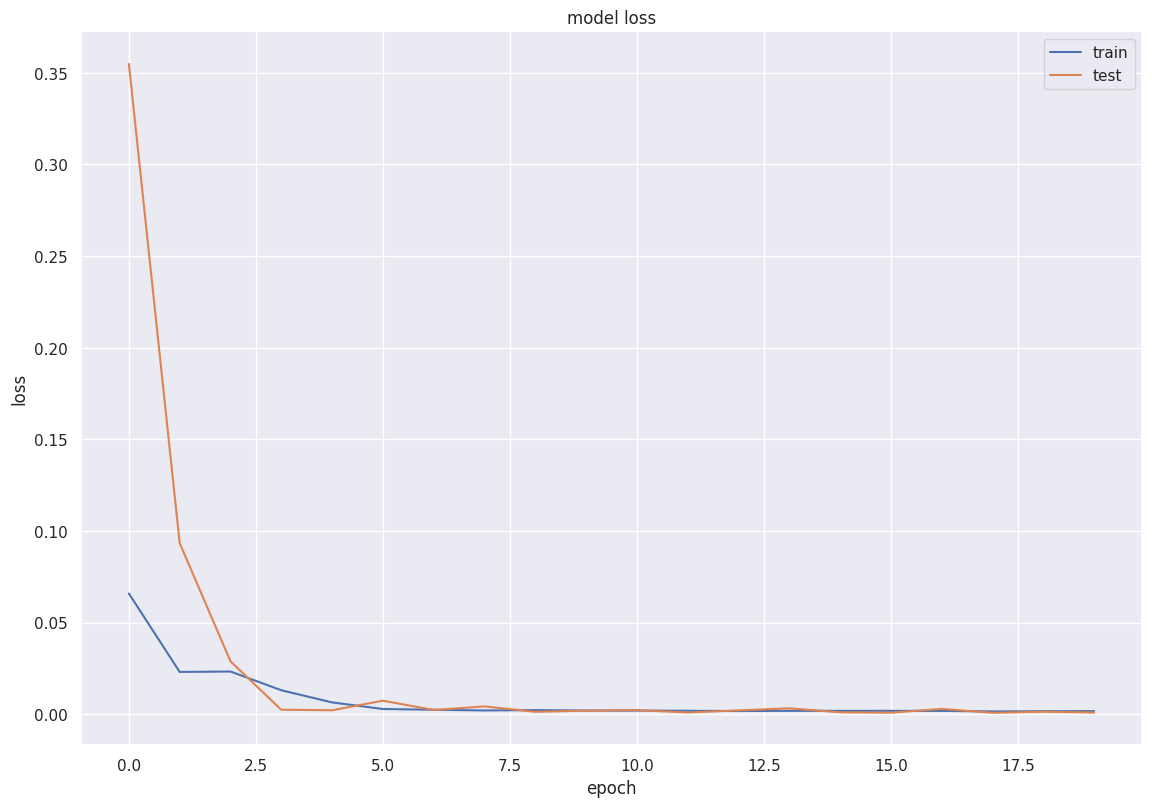

24/24 [==============================] - 0s 3ms/step
Test RMSE: 0.938
average loss  0.008061754499794915


In [41]:
model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2]),activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 6)) #6 number of features used in predection
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -5:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -5:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print('average loss ' , sum(history.history['loss'])/len(history.history['loss']))

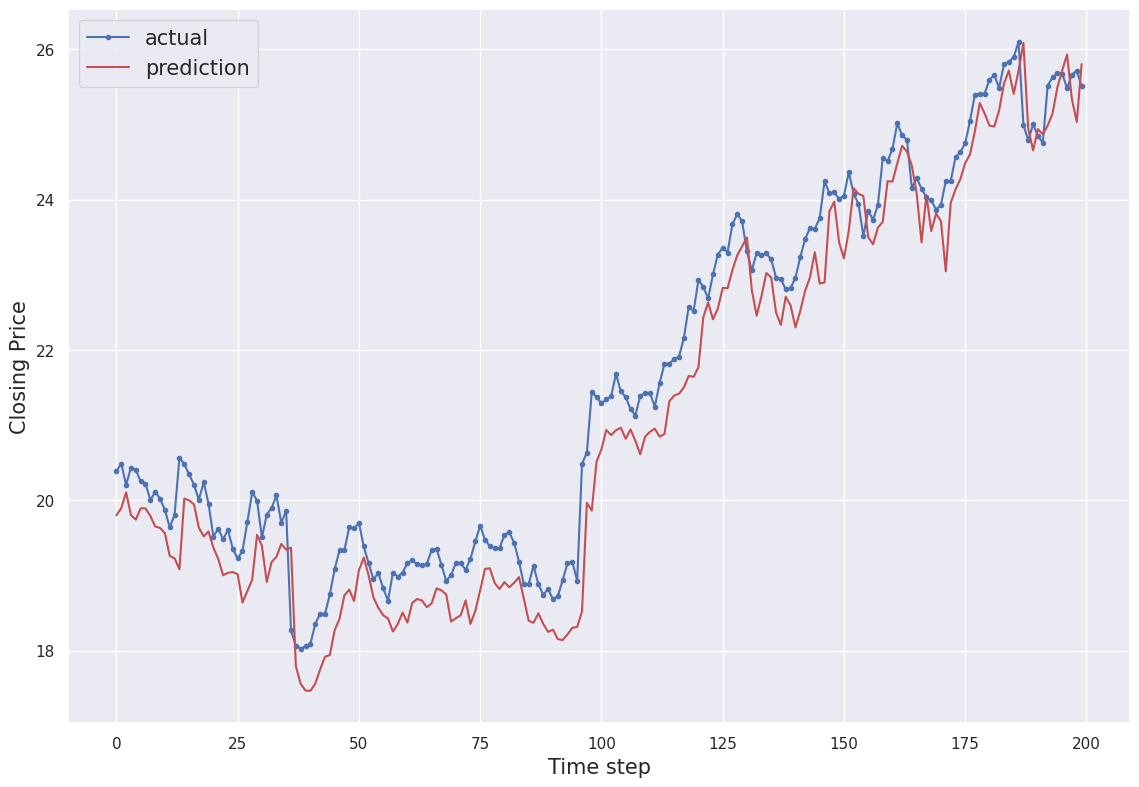

In [42]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Closing Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [43]:
# split into train and test sets
values = reframed.values

n_train_time = int(np.ceil( len(df) * .70 ))
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1762, 1, 6) (1762,) (754, 1, 6) (754,)


Epoch 1/20
26/26 - 5s - loss: 0.0866 - val_loss: 0.5336 - 5s/epoch - 181ms/step
Epoch 2/20
26/26 - 0s - loss: 0.0730 - val_loss: 0.4902 - 283ms/epoch - 11ms/step
Epoch 3/20
26/26 - 0s - loss: 0.0629 - val_loss: 0.4540 - 304ms/epoch - 12ms/step
Epoch 4/20
26/26 - 0s - loss: 0.0559 - val_loss: 0.4235 - 295ms/epoch - 11ms/step
Epoch 5/20
26/26 - 0s - loss: 0.0508 - val_loss: 0.3978 - 307ms/epoch - 12ms/step
Epoch 6/20
26/26 - 0s - loss: 0.0469 - val_loss: 0.3761 - 299ms/epoch - 12ms/step
Epoch 7/20
26/26 - 0s - loss: 0.0445 - val_loss: 0.3579 - 304ms/epoch - 12ms/step
Epoch 8/20
26/26 - 0s - loss: 0.0426 - val_loss: 0.3426 - 312ms/epoch - 12ms/step
Epoch 9/20
26/26 - 0s - loss: 0.0415 - val_loss: 0.3298 - 297ms/epoch - 11ms/step
Epoch 10/20
26/26 - 0s - loss: 0.0407 - val_loss: 0.3193 - 299ms/epoch - 12ms/step
Epoch 11/20
26/26 - 0s - loss: 0.0400 - val_loss: 0.3106 - 291ms/epoch - 11ms/step
Epoch 12/20
26/26 - 0s - loss: 0.0399 - val_loss: 0.3034 - 288ms/epoch - 11ms/step
Epoch 13/20
26/

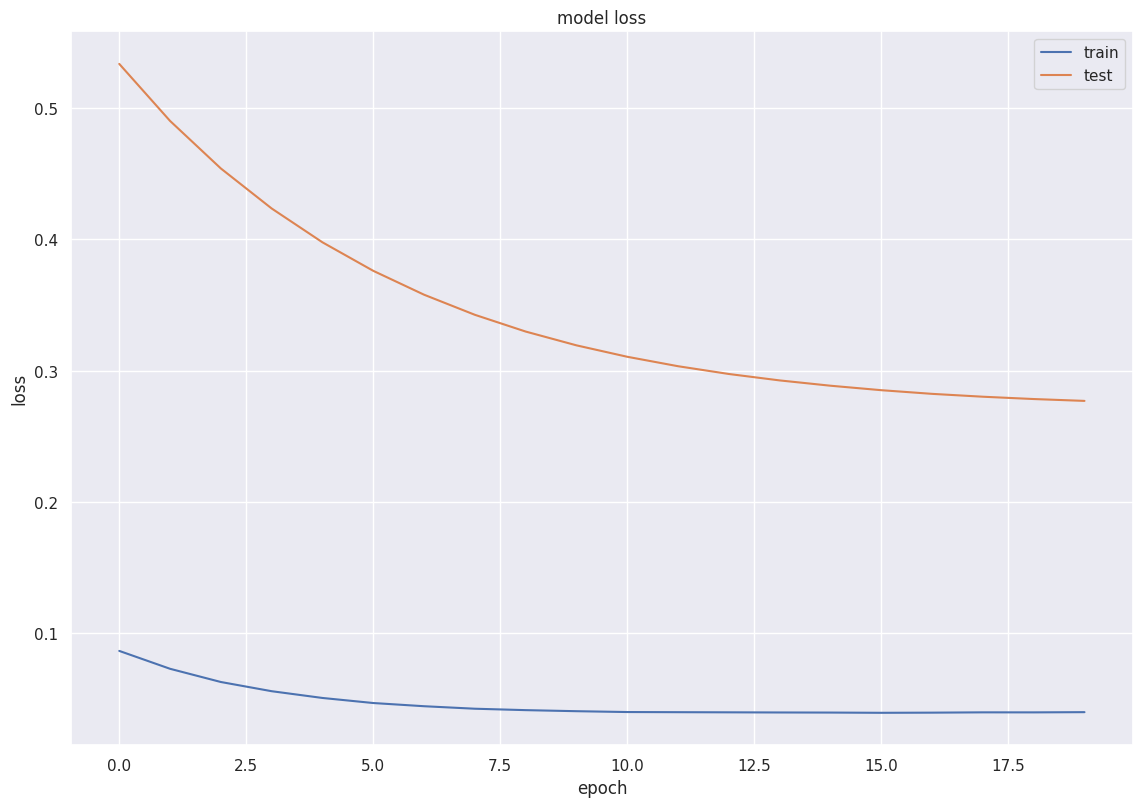

24/24 [==============================] - 1s 5ms/step
Test RMSE: 16.223
average loss  0.047157947346568106


In [44]:
model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2]),activation='softmax'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False,activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 6)) #6 number of features used in predection
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -5:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -5:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print('average loss ' , sum(history.history['loss'])/len(history.history['loss']))

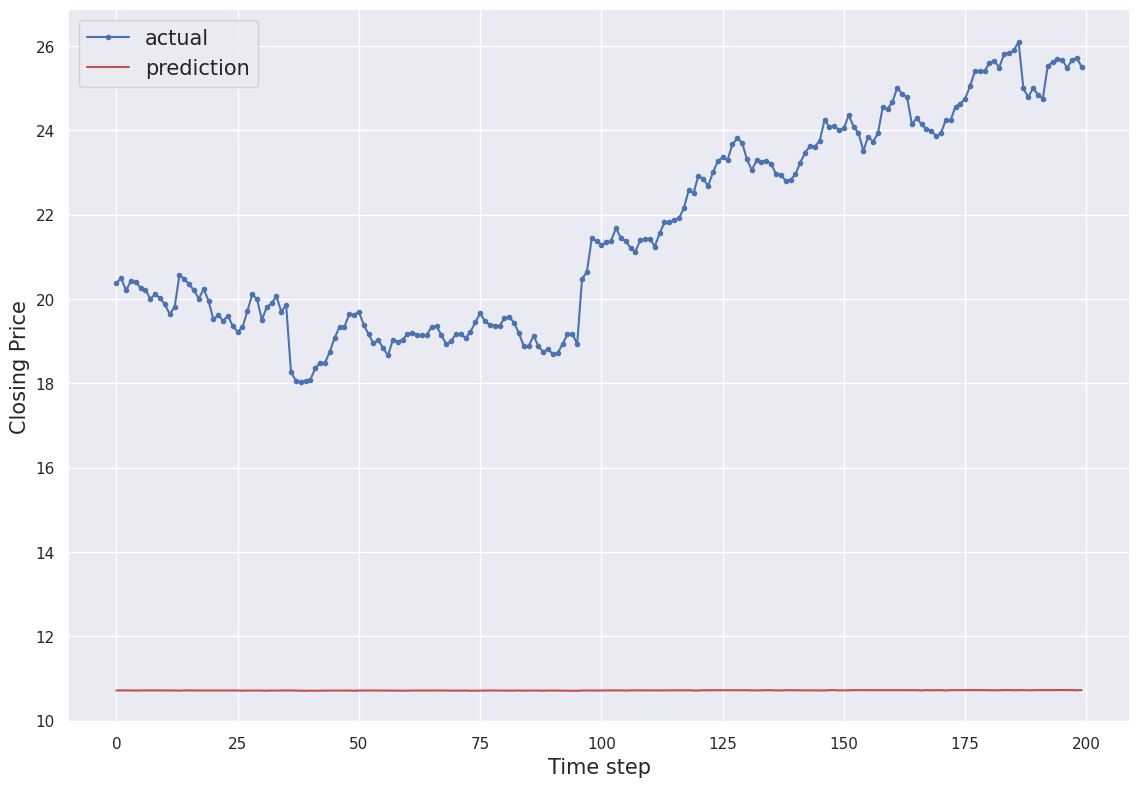

In [45]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Closing Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [46]:
# split into train and test sets
values = reframed.values

n_train_time = int(np.ceil( len(df) * .70 ))
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1762, 1, 6) (1762,) (754, 1, 6) (754,)


Epoch 1/20
26/26 - 4s - loss: 0.0872 - val_loss: 0.0311 - 4s/epoch - 158ms/step
Epoch 2/20
26/26 - 0s - loss: 0.2047 - val_loss: 0.1924 - 276ms/epoch - 11ms/step
Epoch 3/20
26/26 - 0s - loss: 0.1246 - val_loss: 0.2081 - 322ms/epoch - 12ms/step
Epoch 4/20
26/26 - 0s - loss: 0.1002 - val_loss: 0.1865 - 328ms/epoch - 13ms/step
Epoch 5/20
26/26 - 0s - loss: 0.0987 - val_loss: 0.1815 - 311ms/epoch - 12ms/step
Epoch 6/20
26/26 - 0s - loss: 0.0932 - val_loss: 0.1866 - 273ms/epoch - 10ms/step
Epoch 7/20
26/26 - 0s - loss: 0.0861 - val_loss: 0.1764 - 312ms/epoch - 12ms/step
Epoch 8/20
26/26 - 0s - loss: 0.0785 - val_loss: 0.1814 - 304ms/epoch - 12ms/step
Epoch 9/20
26/26 - 0s - loss: 0.0749 - val_loss: 0.1736 - 300ms/epoch - 12ms/step
Epoch 10/20
26/26 - 0s - loss: 0.0725 - val_loss: 0.1669 - 298ms/epoch - 11ms/step
Epoch 11/20
26/26 - 0s - loss: 0.0676 - val_loss: 0.1577 - 299ms/epoch - 11ms/step
Epoch 12/20
26/26 - 0s - loss: 0.0651 - val_loss: 0.1548 - 284ms/epoch - 11ms/step
Epoch 13/20
26/

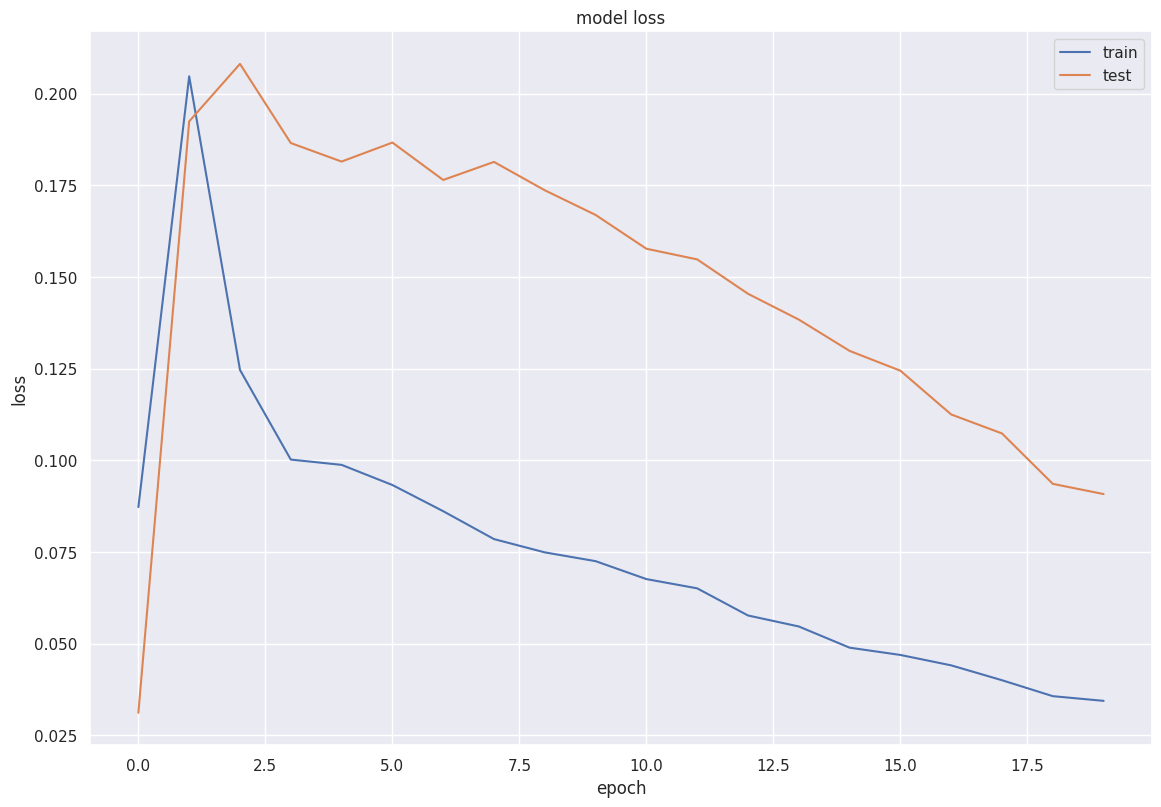

24/24 [==============================] - 0s 3ms/step
Test RMSE: 9.287
average loss  0.07577444538474083


In [47]:
model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2]),activation='sigmoid'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 6)) #6 number of features used in predection
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -5:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -5:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print('average loss ' , sum(history.history['loss'])/len(history.history['loss']))

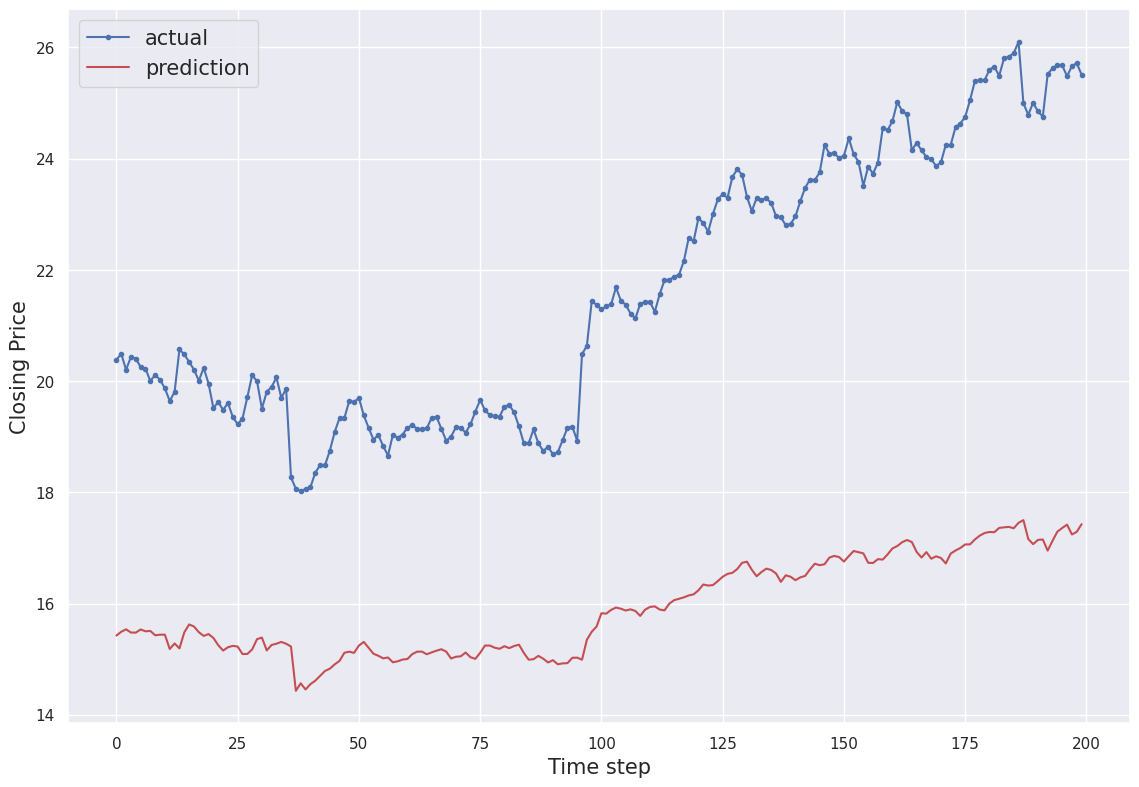

In [48]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Closing Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()